In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Users.csv

In [3]:
users=pd.read_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Data\users.csv')
users.head()

,ID,CREATED_DATE,COUNTRY,BIRTH_DATE
0,46f44852-aaa5-4634-aadd-8cc4eefef3c8,2019-04-22 18:30:30.735,BG,1984-10-22
1,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 02:44:24.94,IE,1984-11-04
2,55e6fcef-f573-4c54-8b27-537adc417e19,2019-04-03 16:10:44.53,PL,1977-09-08
3,dc03019c-9cf1-4081-a70a-6922a44fe393,2019-04-13 14:16:11.928,FR,1992-09-06
4,bcd967e5-c273-45a7-a7f5-e7c9e3b19b7e,2019-04-03 15:46:43.997,IE,1993-10-22


In [4]:
fraudsters=pd.read_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Data\fraudsters.csv').rename(columns={'USER_ID':'ID'})
fraudsters['TARGET']=1
fraudsters.head()

,ID,TARGET
0,2c831c76-2d62-41ce-a240-e12f505d389a,1
1,ce2a1146-831e-49a7-aa5f-a3045a2892af,1
2,447abe11-f89a-4819-bea2-e7978b1cf560,1
3,3a186446-c2fb-474b-a8d8-db362643b3d2,1
4,73fa6100-f6f0-4e22-b247-714f4743c125,1


In [5]:
users=users.merge(fraudsters, on='ID', how='left')
users['TARGET']=users['TARGET'].fillna(0)
users.head()

,ID,CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET
0,46f44852-aaa5-4634-aadd-8cc4eefef3c8,2019-04-22 18:30:30.735,BG,1984-10-22,0.0
1,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 02:44:24.94,IE,1984-11-04,0.0
2,55e6fcef-f573-4c54-8b27-537adc417e19,2019-04-03 16:10:44.53,PL,1977-09-08,0.0
3,dc03019c-9cf1-4081-a70a-6922a44fe393,2019-04-13 14:16:11.928,FR,1992-09-06,0.0
4,bcd967e5-c273-45a7-a7f5-e7c9e3b19b7e,2019-04-03 15:46:43.997,IE,1993-10-22,0.0


In [6]:
users.shape

(200250, 5)

## Created date

In [7]:
print(users['CREATED_DATE'].apply(lambda x: x[0:10]).min())
print(users['CREATED_DATE'].apply(lambda x: x[0:10]).max())

2019-02-02
2019-05-04


In [8]:
users['CREATED_DATE'].apply(lambda x: int(x[0:10].replace('-',''))).hist(bins=92)

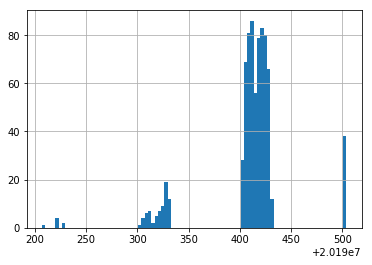

In [9]:
users[users['TARGET']==1]['CREATED_DATE'].apply(lambda x: int(x[0:10].replace('-',''))).hist(bins=92)

In [10]:
users['CREATED_DATE'].apply(lambda x: x[0:10]).value_counts()[0:50]

2019-04-27    8352
2019-05-02    7343
2019-04-28    7125
2019-04-13    6665
2019-04-12    6504
2019-04-25    6457
2019-05-01    6441
2019-04-04    6440
2019-04-26    6435
2019-04-06    6361
2019-04-05    6325
2019-04-18    6321
2019-04-29    6318
2019-04-19    6242
2019-04-07    6160
2019-04-21    6029
2019-04-14    6022
2019-04-17    5979
2019-04-24    5927
2019-04-03    5898
2019-04-20    5872
2019-04-08    5709
2019-04-10    5699
2019-04-30    5589
2019-04-22    5274
2019-04-15    5174
2019-04-11    5156
2019-04-09    4863
2019-04-23    4829
2019-04-16    4716
2019-05-03    3808
2019-04-01    1109
2019-04-02     896
2019-03-30     863
2019-03-31     861
2019-03-29     825
2019-03-28     605
2019-03-27     487
2019-03-25     479
2019-03-23     476
2019-03-26     426
2019-03-24     401
2019-03-22     395
2019-03-20     337
2019-03-21     308
2019-03-16     303
2019-03-14     291
2019-03-17     290
2019-03-15     280
2019-03-18     262
Name: CREATED_DATE, dtype: int64

## Country

In [11]:
users['COUNTRY'].value_counts(normalize=True)[0:10]

GB    0.254582
PL    0.112315
FR    0.097258
IE    0.089503
RO    0.085413
ES    0.058712
PT    0.044395
CH    0.037208
HU    0.034737
IT    0.019670
Name: COUNTRY, dtype: float64

In [12]:
users[users['TARGET']==1]['COUNTRY'].value_counts(normalize=True)[0:10]

GB    0.665786
FR    0.188904
IT    0.047556
IE    0.017173
PT    0.014531
DE    0.009247
BE    0.007926
RO    0.007926
ES    0.006605
PL    0.006605
Name: COUNTRY, dtype: float64

In [13]:
print(f"Overall fraud rate is {round(users['TARGET'].mean()*100,2)} %")

table=pd.pivot_table(users, values=['TARGET'], index='COUNTRY', columns=None, aggfunc=['count','sum','mean'], fill_value=None, margins=False, dropna=True, margins_name='All')
table

Overall fraud rate is 0.38 %


,count,sum,mean
,TARGET,TARGET,TARGET
COUNTRY,,,
AT,619,1.0,0.001616
AU,202,0.0,0.000000
AW,2,0.0,0.000000
BE,1176,6.0,0.005102
BG,2152,1.0,0.000465
BL,3,0.0,0.000000
BM,6,0.0,0.000000
CH,7451,0.0,0.000000


## AGE

In [14]:
print(users['BIRTH_DATE'].apply(lambda x: x[0:10]).min())
print(users['BIRTH_DATE'].apply(lambda x: x[0:10]).max())

1900-12-31
2001-05-03


In [15]:
users['AGE']=2019-users['BIRTH_DATE'].apply(lambda x: int(x[0:4]))

In [16]:
print(users['AGE'].min())
print(users['AGE'].max())

18
119


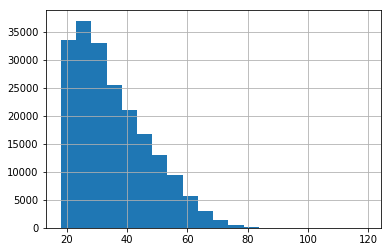

In [17]:
users['AGE'].hist(bins=20)

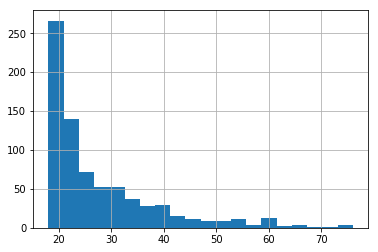

In [18]:
users[users['TARGET']==1]['AGE'].hist(bins=20)

In [19]:
users['AGE_rounded']=users['AGE'].apply(lambda x: round(x,-1))

In [20]:
print(f"Overall fraud rate is {round(users['TARGET'].mean()*100,2)} %")

table=pd.pivot_table(users, values=['TARGET'], index='AGE_rounded', columns=None, aggfunc=['count','sum','mean'], fill_value=None, margins=False, dropna=True, margins_name='All')
table

Overall fraud rate is 0.38 %


,count,sum,mean
,TARGET,TARGET,TARGET
AGE_rounded,,,
20,48046,456.0,0.009491
30,61209,152.0,0.002483
40,47939,87.0,0.001815
50,24855,35.0,0.001408
60,14449,19.0,0.001315
70,3187,6.0,0.001883
80,531,2.0,0.003766
90,28,0.0,0.000000


# Transactions.csv

In [21]:
transactions=pd.read_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Data\transactions.csv')
transactions.head()

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
0,f659b44e-cfdf-48de-bcf3-06f47ef26e9f,fd7f3ff6-0ed6-4a85-a7b5-2f205e0ef72f,2019-04-20 18:04:03.93,CARD_PAYMENT,COMPLETED,13.12,PLN
1,2ae18b8b-b9bc-4c44-96b1-d43efd8d371d,3979518e-95f7-4b6c-81ae-2f828727d81a,2019-05-03 13:09:57.625,TOPUP,REVERTED,0.01,RON
2,0162d352-dd18-40ab-b3ee-cf6584c9a238,75aa5388-9c89-4f72-bc54-67501519585b,2019-04-25 15:37:46.837,TOPUP,COMPLETED,10.00,GBP
3,a4e176f7-49ca-462b-9164-2f0645622148,45598164-6362-4ee4-bd70-ffee3bd1d707,2019-04-28 13:52:15.256,EXCHANGE,COMPLETED,0.11,RON
4,f6f9135f-fb2b-4a58-bb65-dd9713306a71,5a501ce5-f03c-410d-aabc-434b2cad741d,2019-05-13 16:02:12.081,CARD_PAYMENT,COMPLETED,9.79,EUR


In [22]:
transactions.shape

(1068361, 7)

In [23]:
transactions['TYPE'].value_counts()

TOPUP           602096
CARD_PAYMENT    294504
FEE              63458
EXCHANGE         52565
TRANSFER         36382
ATM              19356
Name: TYPE, dtype: int64

In [24]:
transactions['STATE'].value_counts()

COMPLETED    698585
REVERTED     200730
FAILED       105853
DECLINED      63193
Name: STATE, dtype: int64

In [25]:
transactions[transactions['USER_ID']=='f17dd8af-2edb-4415-a950-d90a1b5e3e5b'].sort_values(by='CREATED_DATE')

,ID,USER_ID,CREATED_DATE,TYPE,STATE,AMOUNT_GBP,CURRENCY
347399,09a1bbd2-2a06-4888-84dd-d34d7f2beb22,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 10:06:34.433,TOPUP,REVERTED,0.01,EUR
871687,51751a7a-6878-4340-a760-0f6bfec1a318,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 10:06:42.386,TOPUP,COMPLETED,8.92,EUR
897188,431a12fa-1165-4dc4-8e3f-1982f64115bd,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-15 23:35:33.973,FEE,COMPLETED,7.13,EUR
595416,a2263a6f-5933-4d90-84c6-a570d00dd111,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-25 00:48:53.695,TOPUP,COMPLETED,44.74,EUR
1054290,186cb7d0-c887-4993-bbe7-9683dec9f2cd,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-25 22:38:02.144,CARD_PAYMENT,DECLINED,13.48,AED
739928,fd4060a1-c3cd-4ec5-ba0d-dc57739a7b96,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-25 22:38:46.88,CARD_PAYMENT,COMPLETED,13.48,AED
277437,097bfa80-e5ca-4d0e-b3bc-0c0f18571712,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-25 22:42:26.677,CARD_PAYMENT,COMPLETED,5.35,AED
508274,c442a84e-ec9b-42b7-b248-cca5824fe574,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-26 09:51:42.224,CARD_PAYMENT,COMPLETED,13.87,PHP
221024,567da1b8-e588-4eb1-925c-f4e93c5362a7,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-26 10:23:35.36,TOPUP,FAILED,89.59,EUR
375192,ea6f0a4f-7d85-44e8-8cbd-c4e9e2a6ac5d,f17dd8af-2edb-4415-a950-d90a1b5e3e5b,2019-04-26 12:27:37.4,CARD_PAYMENT,COMPLETED,1.39,PHP


# Final dataset

In [26]:
df=users.rename(columns={'ID':'USER_ID', 'CREATED_DATE':'ACCOUNT_CREATED_DATE'}).merge(transactions, how='inner', on='USER_ID').sort_values(by=['USER_ID','CREATED_DATE']).reset_index(drop=True)

## Auxilliary columns

In [27]:
df['TRANSACTION_ONE']=1
df['TOPUP_ONE']=(df['TYPE']=='TOPUP').astype(int)
df['CP_ONE']=(df['TYPE']=='CARD_PAYMENT').astype(int)
df['FEE_ONE']=(df['TYPE']=='FEE').astype(int)
df['EXCHANGE_ONE']=(df['TYPE']=='EXCHANGE').astype(int)
df['TRANSFER_ONE']=(df['TYPE']=='TRANSFER').astype(int)
df['ATM_ONE']=(df['TYPE']=='ATM').astype(int)

df['COMPLETED_ONE']=(df['STATE']=='COMPLETED').astype(int)
df['REVERTED_ONE']=(df['STATE']=='REVERTED').astype(int)
df['FAILED_ONE']=(df['STATE']=='FAILED').astype(int)
df['DECLINED_ONE']=(df['STATE']=='DECLINED').astype(int)

df['MONEY_IN_ONE']=((df['STATE']=='COMPLETED')&(df['TYPE']=='TOPUP')).astype(int)
df['MONEY_OUT_ONE']=((df['STATE']=='COMPLETED')&(df['TYPE'].apply(lambda x: x in ['CARD_PAYMENT','TRANSFER','ATM','FEE']))).astype(int)

df['TOPUP_NS_ONE']=(df['STATE'].apply(lambda x: x in ['DECLINED','FAILED'])&(df['TYPE']=='TOPUP')).astype(int)
df['TOPUP_S_ONE']=(df['STATE'].apply(lambda x: x not in ['DECLINED','FAILED'])&(df['TYPE']=='TOPUP')).astype(int)

In [28]:
df['TRANSACTION_GBP']=df['AMOUNT_GBP']
df['TOPUP_GBP']=(df['TYPE']=='TOPUP').astype(int)*df['AMOUNT_GBP']
df['CP_GBP']=(df['TYPE']=='CARD_PAYMENT').astype(int)*df['AMOUNT_GBP']
df['FEE_GBP']=(df['TYPE']=='FEE').astype(int)*df['AMOUNT_GBP']
df['EXCHANGE_GBP']=(df['TYPE']=='EXCHANGE').astype(int)*df['AMOUNT_GBP']
df['TRANSFER_GBP']=(df['TYPE']=='TRANSFER').astype(int)*df['AMOUNT_GBP']
df['ATM_GBP']=(df['TYPE']=='ATM').astype(int)*df['AMOUNT_GBP']

df['COMPLETED_GBP']=(df['STATE']=='COMPLETED').astype(int)*df['AMOUNT_GBP']
df['REVERTED_GBP']=(df['STATE']=='REVERTED').astype(int)*df['AMOUNT_GBP']
df['FAILED_GBP']=(df['STATE']=='FAILED').astype(int)*df['AMOUNT_GBP']
df['DECLINED_GBP']=(df['STATE']=='DECLINED').astype(int)*df['AMOUNT_GBP']

df['MONEY_IN_GBP']=((df['STATE']=='COMPLETED')&(df['TYPE']=='TOPUP')).astype(int)*df['AMOUNT_GBP']
df['MONEY_OUT_GBP']=((df['STATE']=='COMPLETED')&(df['TYPE'].apply(lambda x: x in ['CARD_PAYMENT','TRANSFER','ATM','FEE']))).astype(int)*df['AMOUNT_GBP']

df['TOPUP_NS_GBP']=(df['STATE'].apply(lambda x: x in ['DECLINED','FAILED'])&(df['TYPE']=='TOPUP')).astype(int)*df['AMOUNT_GBP']
df['TOPUP_S_GBP']=(df['STATE'].apply(lambda x: x not in ['DECLINED','FAILED'])&(df['TYPE']=='TOPUP')).astype(int)*df['AMOUNT_GBP']

In [29]:
df['CREATED_DATE_DAY']=df['CREATED_DATE'].apply(lambda x: x[:10])
df.head()

,USER_ID,ACCOUNT_CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET,AGE,AGE_rounded,ID,CREATED_DATE,TYPE,...,ATM_GBP,COMPLETED_GBP,REVERTED_GBP,FAILED_GBP,DECLINED_GBP,MONEY_IN_GBP,MONEY_OUT_GBP,TOPUP_NS_GBP,TOPUP_S_GBP,CREATED_DATE_DAY
0,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,9499c9c9-c9a9-410f-820d-c6e92fed27fb,2019-04-11 20:53:54.7,TOPUP,...,0.0,0.00,0.01,0.0,0.0,0.00,0.00,0.0,0.01,2019-04-11
1,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,b310db00-490f-4185-b247-c59f5694dd67,2019-04-11 20:54:02.156,TOPUP,...,0.0,8.92,0.00,0.0,0.0,8.92,0.00,0.0,8.92,2019-04-11
2,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,e6021128-f4c1-4164-b3de-697e66ad613c,2019-04-11 20:55:20.996,FEE,...,0.0,5.34,0.00,0.0,0.0,0.00,5.34,0.0,0.00,2019-04-11
3,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,a9aa681d-451e-44c5-8df0-687661ac583d,2019-04-19 21:05:53.192,TOPUP,...,0.0,115.84,0.00,0.0,0.0,115.84,0.00,0.0,115.84,2019-04-19
4,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,1be7d138-fbaf-4216-8dc8-5056ec5f972c,2019-04-21 10:14:53.814,CARD_PAYMENT,...,0.0,44.44,0.00,0.0,0.0,0.00,44.44,0.0,0.00,2019-04-21


## Using cumulative sums to get the final predictors

In [30]:
for str_ in ['TRANSACTION', 'TOPUP', 'CP', 'FEE', 'EXCHANGE', 'TRANSFER', 'ATM', 'COMPLETED', 'REVERTED', "FAILED", 'DECLINED',
            'MONEY_IN', 'MONEY_OUT', 'TOPUP_NS', 'TOPUP_S']:
    print(f"""df['{str_}_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','{str_}_ONE']].cumsum()
df['{str_}_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','{str_}_ONE']].cumsum()
df['{str_}_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','{str_}_GBP']].cumsum()
df['{str_}_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','{str_}_GBP']].cumsum()
""")

df['TRANSACTION_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSACTION_ONE']].cumsum()
df['TRANSACTION_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSACTION_ONE']].cumsum()
df['TRANSACTION_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSACTION_GBP']].cumsum()
df['TRANSACTION_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSACTION_GBP']].cumsum()

df['TOPUP_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_ONE']].cumsum()
df['TOPUP_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_ONE']].cumsum()
df['TOPUP_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_GBP']].cumsum()
df['TOPUP_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_GBP']].cumsum()

df['CP_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','CP_ONE']].cumsum()
df['CP_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], 

In [31]:
df['TRANSACTION_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSACTION_ONE']].cumsum()
df['TRANSACTION_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSACTION_ONE']].cumsum()
df['TRANSACTION_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSACTION_GBP']].cumsum()
df['TRANSACTION_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSACTION_GBP']].cumsum()

df['TOPUP_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_ONE']].cumsum()
df['TOPUP_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_ONE']].cumsum()
df['TOPUP_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_GBP']].cumsum()
df['TOPUP_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_GBP']].cumsum()

df['CP_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','CP_ONE']].cumsum()
df['CP_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','CP_ONE']].cumsum()
df['CP_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','CP_GBP']].cumsum()
df['CP_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','CP_GBP']].cumsum()

df['FEE_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','FEE_ONE']].cumsum()
df['FEE_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','FEE_ONE']].cumsum()
df['FEE_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','FEE_GBP']].cumsum()
df['FEE_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','FEE_GBP']].cumsum()

df['EXCHANGE_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','EXCHANGE_ONE']].cumsum()
df['EXCHANGE_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','EXCHANGE_ONE']].cumsum()
df['EXCHANGE_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','EXCHANGE_GBP']].cumsum()
df['EXCHANGE_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','EXCHANGE_GBP']].cumsum()

df['TRANSFER_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSFER_ONE']].cumsum()
df['TRANSFER_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSFER_ONE']].cumsum()
df['TRANSFER_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TRANSFER_GBP']].cumsum()
df['TRANSFER_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TRANSFER_GBP']].cumsum()

df['ATM_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','ATM_ONE']].cumsum()
df['ATM_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','ATM_ONE']].cumsum()
df['ATM_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','ATM_GBP']].cumsum()
df['ATM_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','ATM_GBP']].cumsum()

df['COMPLETED_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','COMPLETED_ONE']].cumsum()
df['COMPLETED_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','COMPLETED_ONE']].cumsum()
df['COMPLETED_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','COMPLETED_GBP']].cumsum()
df['COMPLETED_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','COMPLETED_GBP']].cumsum()

df['REVERTED_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','REVERTED_ONE']].cumsum()
df['REVERTED_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','REVERTED_ONE']].cumsum()
df['REVERTED_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','REVERTED_GBP']].cumsum()
df['REVERTED_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','REVERTED_GBP']].cumsum()

df['FAILED_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','FAILED_ONE']].cumsum()
df['FAILED_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','FAILED_ONE']].cumsum()
df['FAILED_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','FAILED_GBP']].cumsum()
df['FAILED_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','FAILED_GBP']].cumsum()

df['DECLINED_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','DECLINED_ONE']].cumsum()
df['DECLINED_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','DECLINED_ONE']].cumsum()
df['DECLINED_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','DECLINED_GBP']].cumsum()
df['DECLINED_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','DECLINED_GBP']].cumsum()

df['MONEY_IN_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','MONEY_IN_ONE']].cumsum()
df['MONEY_IN_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','MONEY_IN_ONE']].cumsum()
df['MONEY_IN_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','MONEY_IN_GBP']].cumsum()
df['MONEY_IN_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','MONEY_IN_GBP']].cumsum()

df['MONEY_OUT_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','MONEY_OUT_ONE']].cumsum()
df['MONEY_OUT_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','MONEY_OUT_ONE']].cumsum()
df['MONEY_OUT_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','MONEY_OUT_GBP']].cumsum()
df['MONEY_OUT_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','MONEY_OUT_GBP']].cumsum()

df['TOPUP_NS_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_NS_ONE']].cumsum()
df['TOPUP_NS_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_NS_ONE']].cumsum()
df['TOPUP_NS_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_NS_GBP']].cumsum()
df['TOPUP_NS_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_NS_GBP']].cumsum()

df['TOPUP_S_NO']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_S_ONE']].cumsum()
df['TOPUP_S_DAY_NO']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_S_ONE']].cumsum()
df['TOPUP_S_SUM']=df.groupby(['USER_ID'], as_index=False)[['USER_ID','TOPUP_S_GBP']].cumsum()
df['TOPUP_S_DAY_SUM']=df.groupby(['USER_ID','CREATED_DATE_DAY'], as_index=False)[['USER_ID','TOPUP_S_GBP']].cumsum()


In [32]:
df['BALANCE']=df['MONEY_IN_SUM']-df['MONEY_OUT_SUM']
df['CURRENCIES']=df.groupby('USER_ID')['CURRENCY'].apply(lambda x: (~pd.Series(x).duplicated()).cumsum())

In [33]:
df['COUNTRY_numeric']=df['COUNTRY'].apply(lambda x: x in ['FR', 'GB', 'GP', 'IT', 'NL', 'RE']).astype(int)

## Deleting the aux columns 

In [34]:
df.columns[0:100]

aux_cols=[
'TRANSACTION_ONE','TRANSACTION_GBP',
       'TOPUP_GBP', 'CP_GBP', 'FEE_GBP', 'EXCHANGE_GBP', 'TRANSFER_GBP',
       'ATM_GBP', 'COMPLETED_GBP', 'REVERTED_GBP', 'FAILED_GBP',
       'DECLINED_GBP', 'MONEY_IN_GBP', 'MONEY_OUT_GBP', 'TOPUP_NS_GBP',
       'TOPUP_S_GBP'
]

pred_cols=[
    'AGE',
    'COUNTRY_numeric',
    'CURENECIES',
    'BALANCE',
    
    
       'TOPUP_ONE', 'CP_ONE',
       'FEE_ONE', 'EXCHANGE_ONE', 'TRANSFER_ONE', 'ATM_ONE', 'COMPLETED_ONE',
       'REVERTED_ONE', 'FAILED_ONE', 'DECLINED_ONE', 'MONEY_IN_ONE',
       'MONEY_OUT_ONE', 'TOPUP_NS_ONE', 'TOPUP_S_ONE', 
    
       'TRANSACTION_NO',
       'TRANSACTION_DAY_NO', 'TRANSACTION_SUM', 'TRANSACTION_DAY_SUM',
       'TOPUP_NO', 'TOPUP_DAY_NO', 'TOPUP_SUM', 'TOPUP_DAY_SUM', 'CP_NO',
       'CP_DAY_NO', 'CP_SUM', 'CP_DAY_SUM', 'FEE_NO', 'FEE_DAY_NO', 'FEE_SUM',
       'FEE_DAY_SUM', 'EXCHANGE_NO', 'EXCHANGE_DAY_NO', 'EXCHANGE_SUM',
       'EXCHANGE_DAY_SUM', 'TRANSFER_NO', 'TRANSFER_DAY_NO', 'TRANSFER_SUM',
       'TRANSFER_DAY_SUM', 'ATM_NO', 'ATM_DAY_NO', 'ATM_SUM', 'ATM_DAY_SUM',
       'COMPLETED_NO', 'COMPLETED_DAY_NO', 'COMPLETED_SUM',
       'COMPLETED_DAY_SUM', 'REVERTED_NO', 'REVERTED_DAY_NO', 'REVERTED_SUM',
       'REVERTED_DAY_SUM', 'FAILED_NO', 'FAILED_DAY_NO', 'FAILED_SUM',
       'FAILED_DAY_SUM', 'DECLINED_NO', 'DECLINED_DAY_NO', 'DECLINED_SUM',
       'DECLINED_DAY_SUM', 'MONEY_IN_NO', 'MONEY_IN_DAY_NO', 'MONEY_IN_SUM',
       'MONEY_IN_DAY_SUM', 'MONEY_OUT_NO', 'MONEY_OUT_DAY_NO', 'MONEY_OUT_SUM',
       'MONEY_OUT_DAY_SUM', 'TOPUP_NS_NO', 'TOPUP_NS_DAY_NO', 'TOPUP_NS_SUM',
       'TOPUP_NS_DAY_SUM'
]

for pred in aux_cols:
    del df[pred]

## Exporting final dataset

In [35]:
df.head()

,USER_ID,ACCOUNT_CREATED_DATE,COUNTRY,BIRTH_DATE,TARGET,AGE,AGE_rounded,ID,CREATED_DATE,TYPE,...,TOPUP_NS_DAY_NO,TOPUP_NS_SUM,TOPUP_NS_DAY_SUM,TOPUP_S_NO,TOPUP_S_DAY_NO,TOPUP_S_SUM,TOPUP_S_DAY_SUM,BALANCE,CURRENCIES,COUNTRY_numeric
0,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,9499c9c9-c9a9-410f-820d-c6e92fed27fb,2019-04-11 20:53:54.7,TOPUP,...,0,0.0,0.0,1,1,0.01,0.01,0.00,1,0
1,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,b310db00-490f-4185-b247-c59f5694dd67,2019-04-11 20:54:02.156,TOPUP,...,0,0.0,0.0,2,2,8.93,8.93,8.92,1,0
2,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,e6021128-f4c1-4164-b3de-697e66ad613c,2019-04-11 20:55:20.996,FEE,...,0,0.0,0.0,2,2,8.93,8.93,3.58,1,0
3,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,a9aa681d-451e-44c5-8df0-687661ac583d,2019-04-19 21:05:53.192,TOPUP,...,0,0.0,0.0,3,1,124.77,115.84,119.42,1,0
4,00001f33-1d47-47a3-8955-e719172e788b,2019-04-11 20:49:42.623,IE,1994-08-17,0.0,25,20,1be7d138-fbaf-4216-8dc8-5056ec5f972c,2019-04-21 10:14:53.814,CARD_PAYMENT,...,0,0.0,0.0,3,0,124.77,0.00,74.98,1,0


In [36]:
df.to_csv(r'c:\Users\hp\Documents\Data_science\Repos\Revolut_assignment\Solution_for_export\data\processed_dataset_for_modelling.csv')